In [1]:

import time
from os import cpu_count

import matplotlib.pyplot as plt
import numpy as np
from torch.onnx.symbolic_opset11 import chunk

from Code.analysis import draw_slope
from Code.sandpile import run_multiple_samples
from sandpile import *
from utils import *
from multiprocessing import Pool, Process, set_start_method
import multiprocessing as mp



# Simulation 

## 2D grid comparisons

In [12]:
params = [
    # (20, "open", "conservative"),
    # (20, "open", "non conservative"),
    # (20, "closed", "conservative"),
    # (20, "closed", "non conservative"),
    # (5, "open", "conservative"),
    # (10, "open", "conservative"),
    # (20, "open", "conservative"),
    # (40, "open", "conservative"),
    # (5, "closed", "non conservative"),
    # (10, "closed", "non conservative"),
    # (20, "closed", "non conservative"),
    # (40, "closed", "non conservative"),
    # (5, "open", "non conservative"),
    # (10, "open", "non conservative"),
    # (20, "open", "non conservative"),
    # (40, "open", "non conservative"),
]


def worker(func, args):
    return func(*args)


tasks = []
for grid, b, p in params:
    system = SandpileND(2, grid, 7, b, p)
    x = run_multiple_samples(system, "./data", 1_000_000, 1, step=50, run=False, desc=f"{grid} {b}, {p}")
    tasks.extend(x)

with mp.Pool(mp.cpu_count() - 2) as pool:
    pool.starmap(worker, tasks)


# ND closed conservative simulations
    

In [2]:
def worker(func, args):
    return func(*args)


params = [
    # (2, 40),
    # (3, 20),
    # (4, 12),
    # (5, 10),
    (6, 10)
]

tasks = []
for dim, grid in params:
    system = SandpileND(dim, grid, 7, "closed", "non conservative")
    x = run_multiple_samples(system, "./data", 1_000_000, 5, step=50, run=False, desc=f"dim {dim}, grid {grid}")
    tasks.extend(x)

with mp.Pool(mp.cpu_count() - 2) as pool:
    pool.starmap(worker, tasks)



dim 6, grid 10 0:   0%|          | 0/999999 [00:00<?, ?it/s]

dim 6, grid 10 1:   0%|          | 0/999999 [00:00<?, ?it/s]

dim 6, grid 10 2:   0%|          | 0/999999 [00:00<?, ?it/s]

dim 6, grid 10 3:   0%|          | 0/999999 [00:00<?, ?it/s]

dim 6, grid 10 4:   0%|          | 0/999999 [00:00<?, ?it/s]

# Visualisation

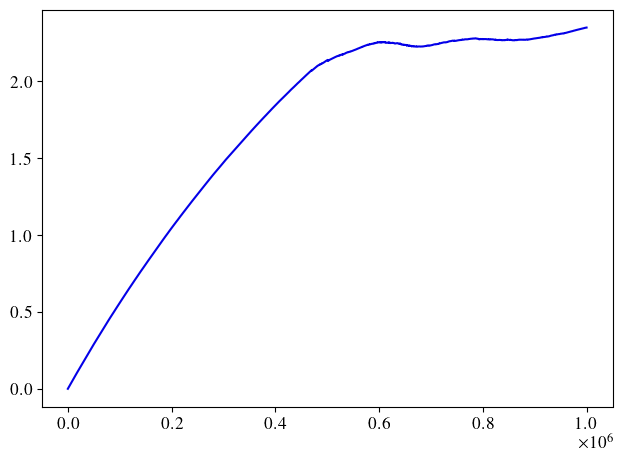

In [10]:
from utils import *
from analysis import *


dim, grid = 6, 10
data_dir = pathlib.Path(f"./data/d{dim}_g{grid}_c7_cl_nco/data_2.slopes.npy").resolve().absolute()

step, slope = load_slope_values(data_dir.__str__())
plt.figure("visualisation")
draw_slope(slope, step)

